# fetch dataset 

In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

print(X, y)

# metadata 

In [2]:
print(predict_students_dropout_and_academic_success.metadata) 

{'uci_id': 697, 'name': "Predict students' dropout and academic success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Other', '

# variable information 

In [3]:
print(predict_students_dropout_and_academic_success.variables)

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

# Data Exploration for Categorical Features

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# martial status

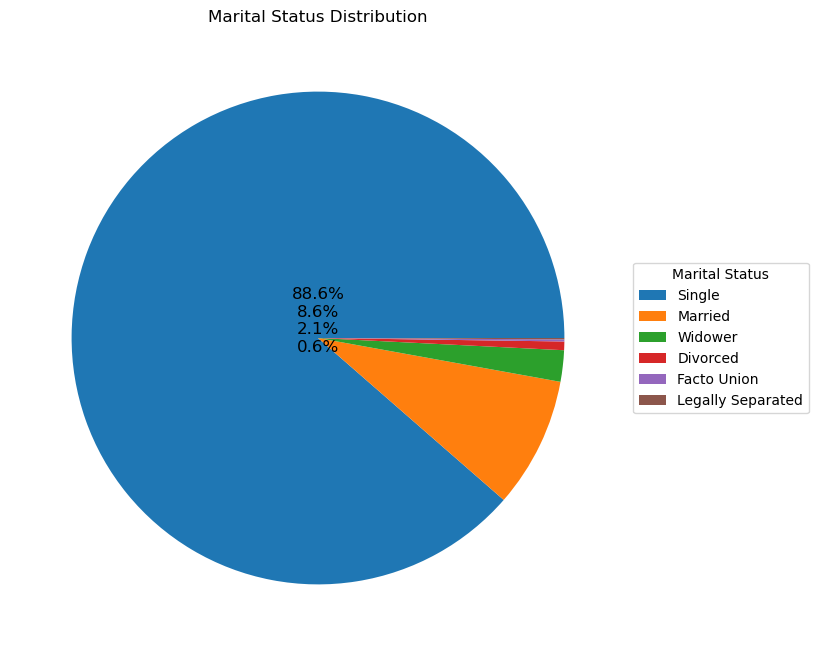

In [5]:
custom_labels = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

marital_status_counts = X['Marital Status'].value_counts()

# Calculate percentages manually
total_count = sum(marital_status_counts)
percentages = [(count / total_count) * 100 for count in marital_status_counts]

# Filter out values less than 1% and replace them with empty strings
autopcts = [f'{p:.1f}%' if p >= 0.25 else '' for p in percentages]

# Create a pie chart without labels on the chart
plt.figure(figsize=(8, 8))
_, _, _ = plt.pie(marital_status_counts, labels=None, autopct='')

# Display the legend with custom labels and percentages
plt.title('Marital Status Distribution')
plt.legend(custom_labels.values(), title="Marital Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.gca().set_aspect('equal')

# Add percentages as text to the pie chart
plt.text(0, 0, '\n'.join(autopcts), ha='center', va='center', fontsize=12)
plt.show()

# Application mode

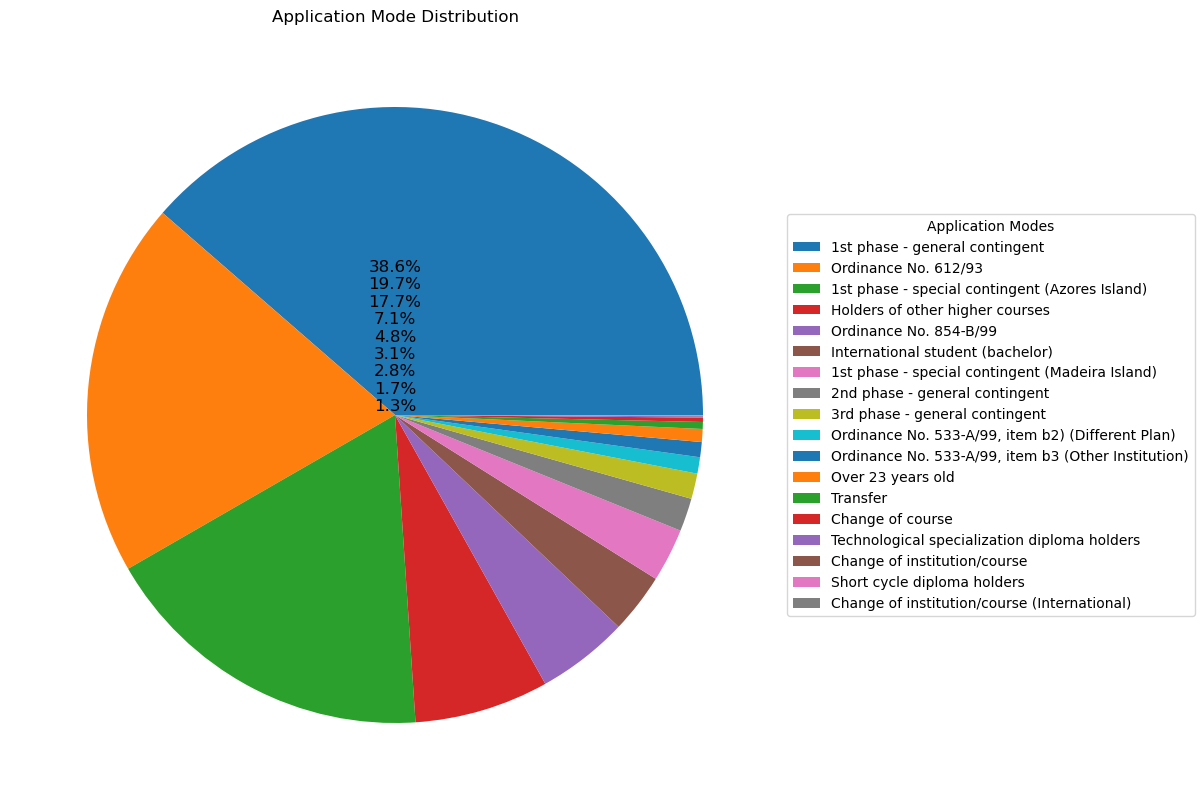

In [6]:
custom_labels = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

application_mode_counts = X['Application mode'].value_counts()

# Calculate percentages manually
total_count = sum(application_mode_counts)
percentages = [(count / total_count) * 100 for count in application_mode_counts]

# Filter out values less than 1% and replace them with empty strings
autopcts = [f'{p:.1f}%' if p >= 1 else '' for p in percentages]

# Create labels for the legend
legend_labels = application_mode_counts.index

# Create a pie chart without labels on the chart
plt.figure(figsize=(10, 10))
_, _, _ = plt.pie(application_mode_counts, labels=None, autopct='')

# Display the legend with custom labels and percentages
plt.title('Application Mode Distribution')
plt.legend(custom_labels.values(), title="Application Modes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.gca().set_aspect('equal') 

# Add percentages as text to the pie chart
plt.text(0, 0, '\n'.join(autopcts), ha='center', va='center', fontsize=12)

plt.show()

# Data Exploration for Numerical Features

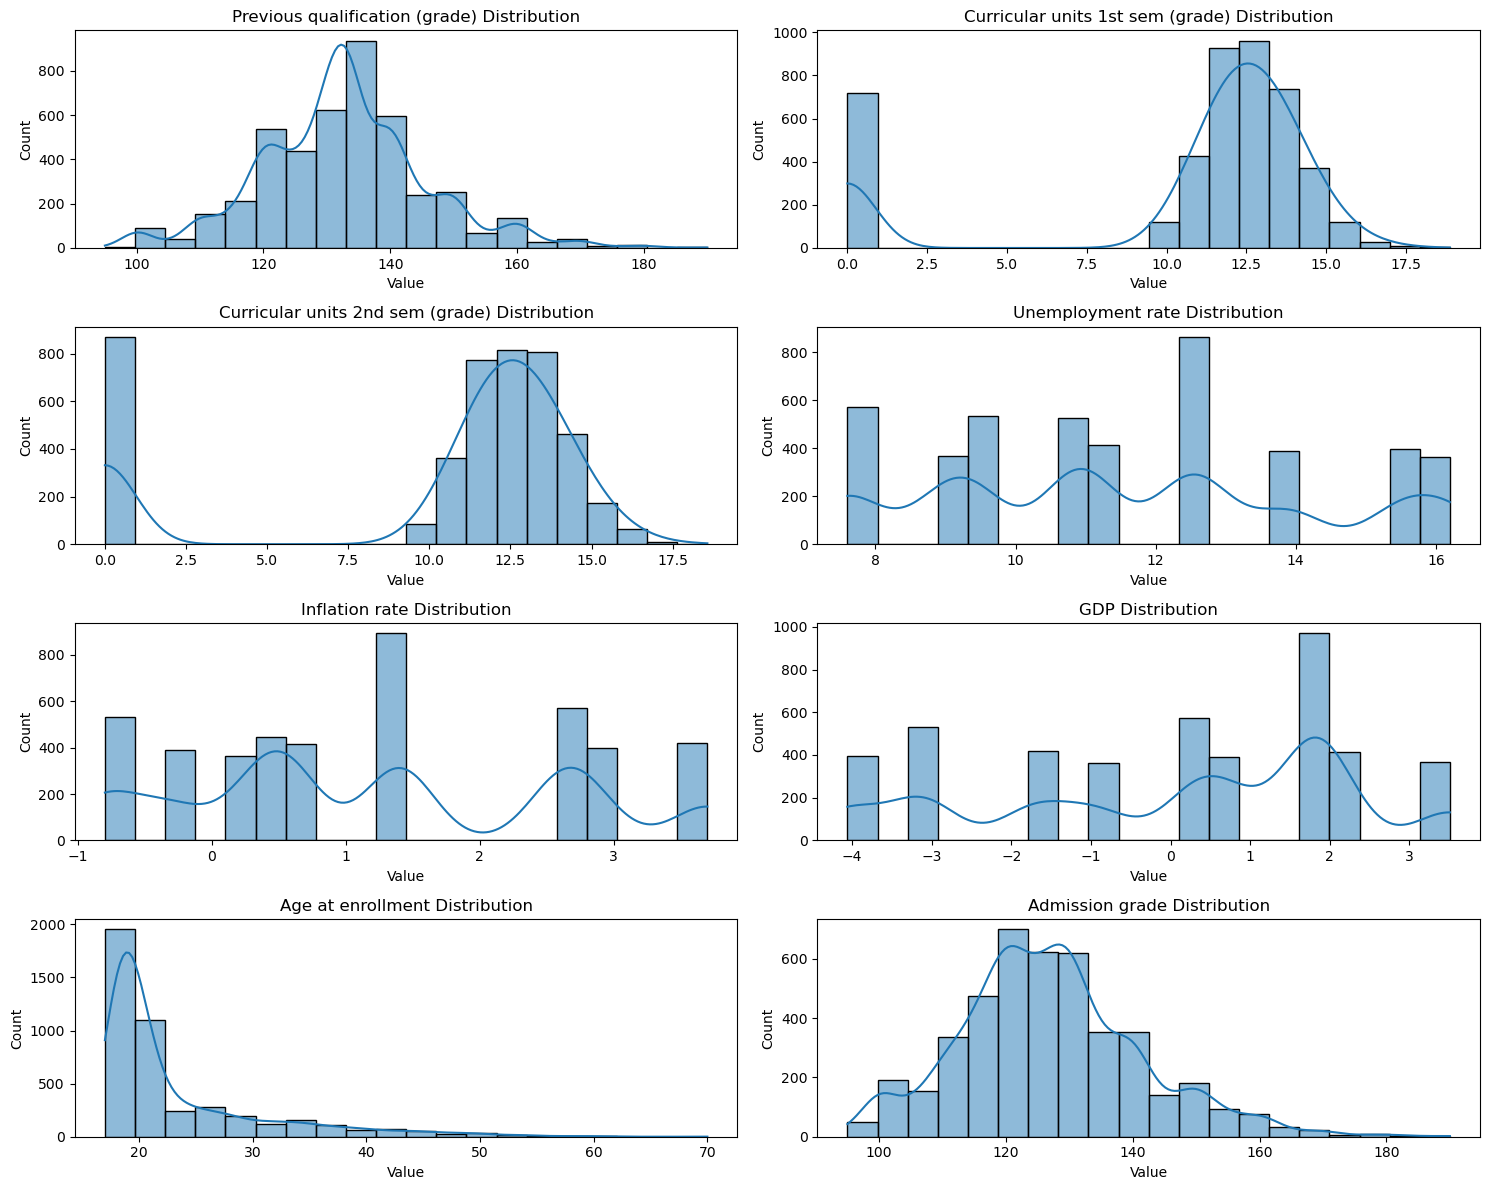

In [8]:
# List of numerical feature column names
numerical_features = [
    'Previous qualification (grade)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Age at enrollment',
    'Admission grade' 
]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2

    # Plot histograms for each feature
    sns.histplot(X[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Count')

# Show plots
plt.tight_layout()
plt.show()

# Correlation Matrix for Numerical Features

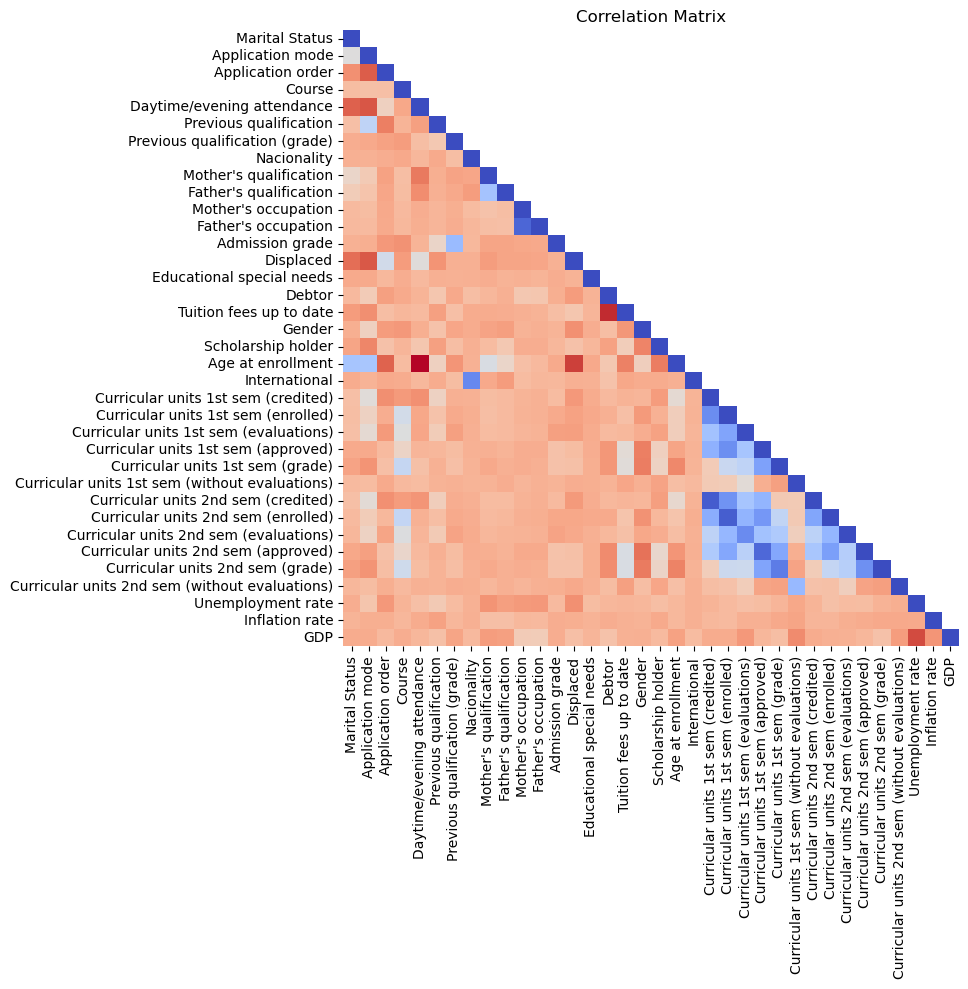

In [9]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        correlation_matrix.iloc[i, j] = None

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm_r', fmt=".1f", square=True, cbar=False)

plt.title('Correlation Matrix')

# Show the plot
plt.show()

# Target Variable Distribution

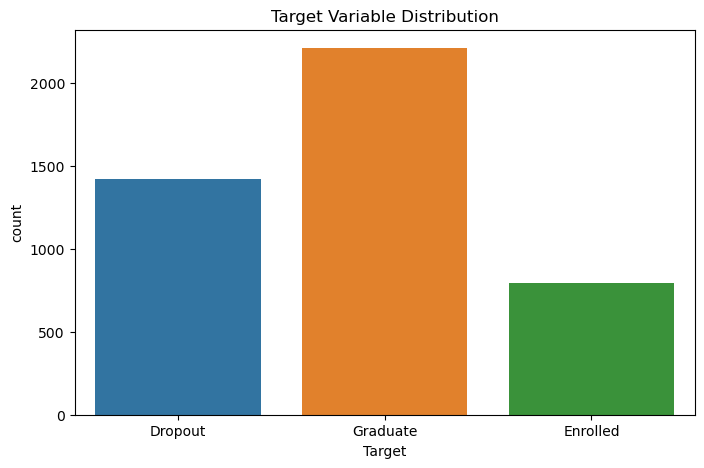

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=y)
plt.title('Target Variable Distribution')
plt.show()

# Distribution for each binomial feature wrt target variable

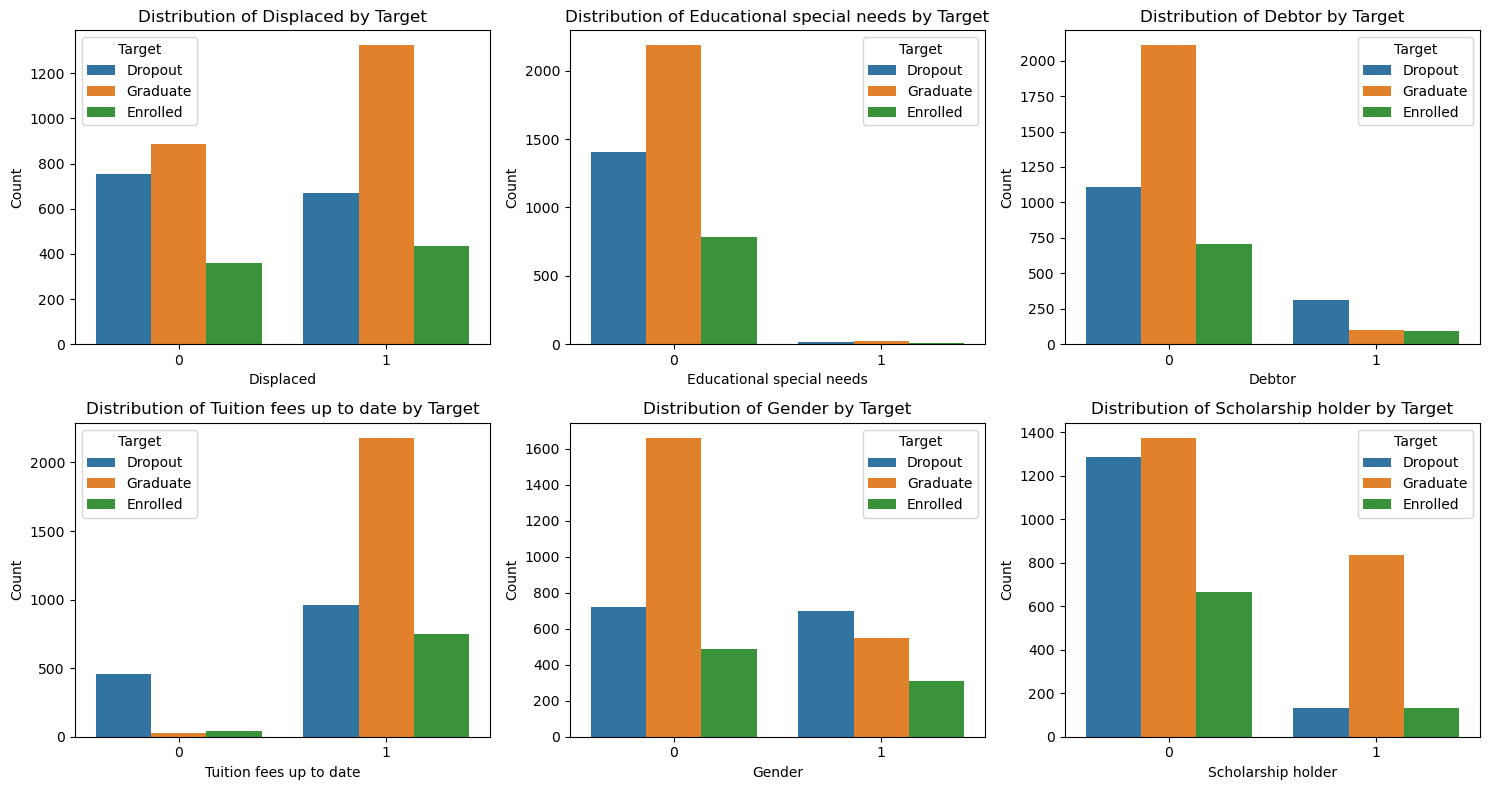

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Binomial features
binomial_features = ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

# Loop through binomial features and create count plots
for i, feature in enumerate(binomial_features):
    row = i // 3
    col = i % 3
    sns.countplot(data=X, x=feature, hue=y['Target'], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} by Target')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Change to binary target

In [12]:
mapping = {
    'Dropout': 0,  # Combine 'Dropout' and 'Enrolled' into Class 0
    'Enrolled': 0,
    'Graduate': 1  # Class 1 remains 'Graduate'
}

y['target_binary'] = y['Target'].map(mapping)
y['target_binary']

C:\Users\navya\AppData\Local\Temp\ipykernel_20000\2957322292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['target_binary'] = y['Target'].map(mapping)


0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: target_binary, Length: 4424, dtype: int64

# Split the dataset into training (70%) and testing (30%) sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y['target_binary'], test_size=0.3, random_state=42)

# Standardization (Z-score Scaling)

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_rep)

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.79       686
           1       0.76      0.85      0.80       642

    accuracy                           0.80      1328
   macro avg       0.80      0.80      0.80      1328
weighted avg       0.80      0.80      0.80      1328



C:\Users\navya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# grid search for knn

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

C:\Users\navya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\navya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\navya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\navya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# KNN Classifier

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a range of k values to test
k_values =  [9, 11, 13, 15, 17]

# Initialize a dictionary to store cross-validation results for each k
cv_results = {}

# Loop through each k and perform cross-validation
for k in k_values:
    knn_classifier.n_neighbors = k
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_results[k] = scores.mean()

# Find the best k based on cross-validation results
best_k = max(cv_results, key=cv_results.get)
best_score = cv_results[best_k]

print(f"Best k: {best_k}")
print(f"Cross-validation accuracy with best k: {best_score:.2f}")

# Train the final model with the best k on the entire training set
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
test_accuracy = final_model.score(X_test, y_test)
print(f"Test set accuracy with best k: {test_accuracy:.2f}")

C:\Users\navya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\navya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\navya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\navya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best k: 13
Cross-validation accuracy with best k: 0.69
Test set accuracy with best k: 0.70


# Gradient Boosting Classifier model

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
# Build the Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.76
Confusion Matrix:
 [[240  31  45]
 [ 39  48  64]
 [  8  24 386]]
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       316
    Enrolled       0.47      0.32      0.38       151
    Graduate       0.78      0.92      0.85       418

    accuracy                           0.76       885
   macro avg       0.69      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



# Decision Tree classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.80
Confusion Matrix:
 [[549 137]
 [129 513]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       686
           1       0.79      0.80      0.79       642

    accuracy                           0.80      1328
   macro avg       0.80      0.80      0.80      1328
weighted avg       0.80      0.80      0.80      1328



# Random Forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.84
Confusion Matrix:
 [[555 131]
 [ 76 566]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       686
           1       0.81      0.88      0.85       642

    accuracy                           0.84      1328
   macro avg       0.85      0.85      0.84      1328
weighted avg       0.85      0.84      0.84      1328



# SVM classifier

In [33]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.83
Confusion Matrix:
 [[542 144]
 [ 79 563]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       686
           1       0.80      0.88      0.83       642

    accuracy                           0.83      1328
   macro avg       0.83      0.83      0.83      1328
weighted avg       0.84      0.83      0.83      1328



# Gaussian Naive Bayes classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.75
Confusion Matrix:
 [[423 263]
 [ 66 576]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72       686
           1       0.69      0.90      0.78       642

    accuracy                           0.75      1328
   macro avg       0.78      0.76      0.75      1328
weighted avg       0.78      0.75      0.75      1328



# Neural networks

In [41]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y["Target"], test_size=0.2, random_state=42)

# Encode the target labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')  # 3 classes for dropout, enrolled, and graduate
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = [label_encoder.classes_[i] for i in y_pred.argmax(axis=-1)]
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Epoch 1/20
89/89 - 1s - loss: 588.8732 - accuracy: 0.3854 - val_loss: 8.5250 - val_accuracy: 0.5085 - 1s/epoch - 15ms/step
Epoch 2/20
89/89 - 0s - loss: 96.7208 - accuracy: 0.3751 - val_loss: 1.0853 - val_accuracy: 0.3150 - 275ms/epoch - 3ms/step
Epoch 3/20
89/89 - 0s - loss: 19.5917 - accuracy: 0.4401 - val_loss: 1.1070 - val_accuracy: 0.3164 - 231ms/epoch - 3ms/step
Epoch 4/20
89/89 - 0s - loss: 8.8522 - accuracy: 0.4592 - val_loss: 1.0789 - val_accuracy: 0.3164 - 238ms/epoch - 3ms/step
Epoch 5/20
89/89 - 0s - loss: 5.6341 - accuracy: 0.4712 - val_loss: 1.1062 - val_accuracy: 0.5099 - 229ms/epoch - 3ms/step
Epoch 6/20
89/89 - 0s - loss: 3.6610 - accuracy: 0.4818 - val_loss: 1.0252 - val_accuracy: 0.5085 - 307ms/epoch - 3ms/step
Epoch 7/20
89/89 - 0s - loss: 2.9068 - accuracy: 0.4843 - val_loss: 1.0327 - val_accuracy: 0.5085 - 248ms/epoch - 3ms/step
Epoch 8/20
89/89 - 0s - loss: 2.6692 - accuracy: 0.4875 - val_loss: 1.0245 - val_accuracy: 0.5085 - 230ms/epoch - 3ms/step
Epoch 9/20
89/

C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LDA model

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# Fit LDA on the training data and perform dimensionality reduction
X_train_lda = lda.fit_transform(X_train, y_train_encoded)
X_test_lda = lda.transform(X_test)

# Build a classifier (e.g., Logistic Regression) on the reduced-dimension data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_lda, y_train_encoded)

# Make predictions on the test data
y_pred = classifier.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.75
Confusion Matrix:
 [[242  33  41]
 [ 33  42  76]
 [ 18  24 376]]
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.77      0.79       316
    Enrolled       0.42      0.28      0.34       151
    Graduate       0.76      0.90      0.83       418

    accuracy                           0.75       885
   macro avg       0.67      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885



# QDA model

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

# Fit QDA on the training data
qda.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred = qda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report

Accuracy: 0.71
Confusion Matrix:
 [[222  46  48]
 [ 32  55  64]
 [ 18  46 354]]
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.82      0.70      0.76       316
    Enrolled       0.37      0.36      0.37       151
    Graduate       0.76      0.85      0.80       418

    accuracy                           0.71       885
   macro avg       0.65      0.64      0.64       885
weighted avg       0.71      0.71      0.71       885

